# Digit Recognizer Problem

## 1. Data preparation

In [2]:
# Import the libraries needed
import keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten 
#from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split  # split the data to train and test
import tensorflow as tf
from keras.layers import Convolution2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

In [3]:
# Import the data
import random
random.seed(43)

import pandas as pd
read_train = pd.read_csv("train.csv")
read_test = pd.read_csv("test.csv")

# Create a structure with just the images, so drop the label for the images
X = read_train.drop(['label'], axis = 1)
# create a new array with just the labels
Y = read_train['label']

In [4]:
#Check the size of the X data
print(X.shape)

(42000, 784)


In [5]:
# Turn the image data to float, leave the labels are integers
X_train = X.astype('float32')
print(X_train.shape)
#print(X_train.dtypes)

(42000, 784)


In [6]:
# the values of the images are from 0-255, normalize them
X_train = X_train/255.0
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

X_train shape: (42000, 784)
42000 train samples


In [7]:
# The size of the images is 784 pixels, resize them to 28x28 pixel images
Xtrain = X_train.values.reshape(X_train.shape[0], 28, 28,1)
#Xtrain[7:10,7:11,20]
print(Xtrain.dtype)
print(Xtrain.shape)

float64
(42000, 28, 28, 1)


In [8]:
#check the size of the labels
print(Y.shape)
print(Y[5:10])

(42000,)
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64


In [9]:
# there are 10 classes, labels are from 0-9
num_classes=10
# Convert the class vector (integers) to binary class matrix.
Ytrain = keras.utils.to_categorical(Y, num_classes) 
# the output has as many columns as there are classes while the rows stay the same, one hot encoding
print(Ytrain.shape)
print(Ytrain[5:10])

(42000, 10)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [10]:
# split the data to training and test data
Xtr, Xval, Ytr, Yval = train_test_split(Xtrain, Ytrain, test_size = 0.2, random_state=42)
#size of training and validation data
print(Xtr.shape)
print(Xval.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)


In [11]:
# Size of training and validation labels
print(Ytr.shape)
print(Yval.shape)

(33600, 10)
(8400, 10)


## 2. Build and define the model

Use DNN+CNN

In [13]:
# Define the parameters of the model adding dropout this time
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5), # for retaining the output of each node in a hidden layer 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
#compile the model with an optimizer and loss function 
model.compile(optimizer = tf.train.AdamOptimizer(),loss = 'categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
# train the model by calling *model.fit * , we are asking it to fit your training data to your training labels
history=model.fit(Xtr, Ytr, epochs=100)

Epoch 1/100
33600/33600 [==============================] - 41s 1ms/sample - loss: 0.1794 - acc: 0.9453
Epoch 2/100
33600/33600 [==============================] - 41s 1ms/sample - loss: 0.0675 - acc: 0.9785
Epoch 3/100
33600/33600 [==============================] - 41s 1ms/sample - loss: 0.0453 - acc: 0.9853
Epoch 4/100
33600/33600 [==============================] - 41s 1ms/sample - loss: 0.0308 - acc: 0.9896
Epoch 5/100
33600/33600 [==============================] - 41s 1ms/sample - loss: 0.0257 - acc: 0.9912
Epoch 6/100
33600/33600 [==============================] - 51s 2ms/sample - loss: 0.0206 - acc: 0.9930
Epoch 7/100
33600/33600 [==============================] - 52s 2ms/sample - loss: 0.0167 - acc: 0.9947
Epoch 8/100
33600/33600 [==============================] - 46s 1ms/sample - loss: 0.0125 - acc: 0.9955
Epoch 9/100
33600/33600 [==============================] - 46s 1ms/sample - loss: 0.0133 - acc: 0.9952
Epoch 10/100
33600/33600 [==============================] - 52s 2ms/sampl

33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0033 - acc: 0.9993
Epoch 80/100
33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0021 - acc: 0.9994
Epoch 81/100
33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0052 - acc: 0.9991
Epoch 82/100
33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0032 - acc: 0.9993
Epoch 83/100
33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0040 - acc: 0.9993
Epoch 84/100
33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0024 - acc: 0.9994
Epoch 85/100
33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0029 - acc: 0.9994
Epoch 86/100
33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0042 - acc: 0.9992
Epoch 87/100
33600/33600 [==============================] - 34s 1ms/sample - loss: 0.0021 - acc: 0.9995
Epoch 88/100
33600/33600 [==============================] - 34s 1ms/sample - 

In [16]:
#Now test the test data, which are images that the program has not seen
model.evaluate(Xval, Yval)

8400/8400 [==============================] - 2s 250us/sample - loss: 0.1888 - acc: 0.9876


[0.1888260085000259, 0.98761904]

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5538304   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 5,544,074
Trainable params: 5,544,074
Non-trainable params: 0
____________________________________________

[0.9452976, 0.9785119, 0.98532736, 0.9895833, 0.9911607, 0.99303573, 0.9946726, 0.9955059, 0.9951786, 0.99633926, 0.9958929, 0.9969048, 0.99705356, 0.9977083, 0.99735117, 0.9977083, 0.9971726, 0.9983036, 0.99735117, 0.9978869, 0.99833333, 0.998125, 0.99883926, 0.9976786, 0.99854165, 0.9983036, 0.99892855, 0.9987202, 0.9982143, 0.9980655, 0.99886906, 0.99848217, 0.99925596, 0.9986905, 0.99886906, 0.9983929, 0.99883926, 0.99866074, 0.99886906, 0.9991369, 0.99904764, 0.9987202, 0.99883926, 0.99934524, 0.99863094, 0.9988988, 0.99854165, 0.9986012, 0.9987202, 0.99904764, 0.9994643, 0.9987798, 0.99925596, 0.999375, 0.99883926, 0.9991369, 0.9996726, 0.99886906, 0.99866074, 0.99925596, 0.99925596, 0.9994048, 0.9989881, 0.9995238, 0.9993155, 0.9993155, 0.9988988, 0.9989881, 0.9994643, 0.9991964, 0.99925596, 0.9992262, 0.99904764, 0.9994643, 0.9992857, 0.9992857, 0.99934524, 0.9991071, 0.9993155, 0.999375, 0.9991071, 0.9993155, 0.99925596, 0.99943453, 0.999375, 0.9992262, 0.9995238, 0.99973214, 

<IPython.core.display.Javascript object>


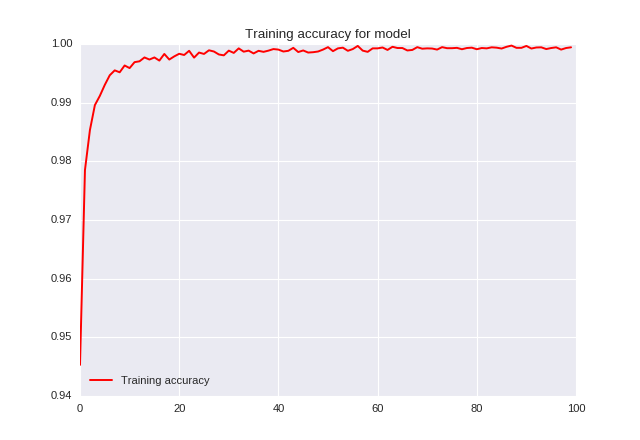

In [18]:
%matplotlib notebook
# plot the accuracy of the training model
#history.history
acc = history.history['acc']
print(acc)
epoch1 = range(len(acc)) # because we want it to much the dimensions of acc,val_acc
plt.plot(epoch1, acc, 'r', label='Training accuracy')
plt.title('Training accuracy for model')
plt.legend(loc='lower left')

## 3. Confusion matrix

In [19]:
predictions=model.predict(Xval)

In [20]:
print(predictions.shape) # Probabilities for each label
predictions[5:10]

(8400, 10)


array([[1.7726316e-20, 0.0000000e+00, 7.5073657e-37, 0.0000000e+00,
        1.0515265e-31, 9.1309722e-18, 1.0000000e+00, 0.0000000e+00,
        8.3564775e-27, 3.5845218e-18],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.8002975e-27, 1.0000000e+00, 3.4904450e-25,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.4063811e-38,
        1.9013209e-35, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.2589262e-29, 0.0000000e+00, 2.9871809e-37, 0.0000000e+00,
        3.7082946e-33, 0.0000000e+00]], dtype=float32)

In [21]:
# turn the predicted probabilities to predicted labels
labels_prediction=np.argmax(predictions, axis=1)    
labels_prediction[5:10]

array([6, 2, 2, 7, 1])

In [22]:
# Check the validation data
Yval[5:10] 

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
# turn from one hot encoding to a matrix with classes
label_validation=np.argmax(Yval, axis=1)  
label_validation[5:10]

array([6, 2, 2, 7, 1])

In [24]:
# calculate the confusion matrix
mat=confusion_matrix(labels_prediction,label_validation)
print(mat)

[[808   0   2   0   1   0   0   0   0   0]
 [  0 904   4   0   0   0   1   1   0   0]
 [  2   1 832   0   0   0   1   3   0   1]
 [  0   0   2 919   0   4   0   1   0   2]
 [  1   0   3   0 828   0   1   1   2   6]
 [  0   0   0   4   0 693   2   0   4   3]
 [  3   1   0   0   4   2 777   0   0   0]
 [  1   1   0   3   1   0   0 885   0   2]
 [  0   2   3   9   0   2   3   1 828   2]
 [  1   0   0   2   5   1   0   1   1 822]]


In [25]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(label_validation, labels_prediction, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99       816
     Class 1       0.99      0.99      0.99       909
     Class 2       0.99      0.98      0.99       846
     Class 3       0.99      0.98      0.99       937
     Class 4       0.98      0.99      0.99       839
     Class 5       0.98      0.99      0.98       702
     Class 6       0.99      0.99      0.99       785
     Class 7       0.99      0.99      0.99       893
     Class 8       0.97      0.99      0.98       835
     Class 9       0.99      0.98      0.98       838

   micro avg       0.99      0.99      0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



## 4. Different model using data augmentation

In [27]:
# Use the same model as before
nmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5), # for retaining the output of each node in a hidden layer 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
nmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# Use data augmentation to avoid overfitting
# We are not imposing vertical_flip or horizontal_flip 
# because there are some symmetrical numbers

# Load the image data generator to help with augmentation
datagen=ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2, 
                               fill_mode='nearest',
                               horizontal_flip=False)                     

batch_size=100 
epochs=100      
# Create an iterator for an image dataset
# An iterator can be created from an image dataset loaded in memory via the flow() function
train_generator = datagen.flow(Xtr,Ytr,batch_size=batch_size)
validation_generator=datagen.flow(Xval,Yval,batch_size=batch_size)

In [28]:
# Fit the same model with the new data in batches
nhistory = nmodel.fit_generator(train_generator, 
                              epochs = epochs, 
                              steps_per_epoch  = Xtr.shape[0] // batch_size,
                              validation_data  = validation_generator,
                              validation_steps = Xval.shape[0] // batch_size)


Epoch 1/100
336/336 [==============================] - 30s 88ms/step - loss: 0.7831 - acc: 0.7456 - val_loss: 0.3323 - val_acc: 0.9046
Epoch 2/100
336/336 [==============================] - 29s 87ms/step - loss: 0.3241 - acc: 0.9013 - val_loss: 0.2468 - val_acc: 0.9252
Epoch 3/100
336/336 [==============================] - 29s 88ms/step - loss: 0.2478 - acc: 0.9227 - val_loss: 0.2035 - val_acc: 0.9401
Epoch 4/100
336/336 [==============================] - 29s 87ms/step - loss: 0.2167 - acc: 0.9324 - val_loss: 0.1776 - val_acc: 0.9445
Epoch 5/100
336/336 [==============================] - 34s 102ms/step - loss: 0.1913 - acc: 0.9404 - val_loss: 0.1509 - val_acc: 0.9546
Epoch 6/100
336/336 [==============================] - 32s 94ms/step - loss: 0.1728 - acc: 0.9459 - val_loss: 0.1407 - val_acc: 0.9593
Epoch 7/100
336/336 [==============================] - 35s 104ms/step - loss: 0.1599 - acc: 0.9507 - val_loss: 0.1192 - val_acc: 0.9636
Epoch 8/100
336/336 [==============================] 

336/336 [==============================] - 28s 85ms/step - loss: 0.0679 - acc: 0.9797 - val_loss: 0.0513 - val_acc: 0.9838
Epoch 62/100
336/336 [==============================] - 28s 83ms/step - loss: 0.0658 - acc: 0.9799 - val_loss: 0.0538 - val_acc: 0.9833
Epoch 63/100
336/336 [==============================] - 28s 84ms/step - loss: 0.0651 - acc: 0.9799 - val_loss: 0.0540 - val_acc: 0.9833
Epoch 64/100
336/336 [==============================] - 29s 86ms/step - loss: 0.0634 - acc: 0.9805 - val_loss: 0.0547 - val_acc: 0.9849
Epoch 65/100
336/336 [==============================] - 30s 88ms/step - loss: 0.0664 - acc: 0.9796 - val_loss: 0.0497 - val_acc: 0.9840
Epoch 66/100
336/336 [==============================] - 29s 86ms/step - loss: 0.0614 - acc: 0.9805 - val_loss: 0.0541 - val_acc: 0.9844
Epoch 67/100
336/336 [==============================] - 29s 87ms/step - loss: 0.0647 - acc: 0.9801 - val_loss: 0.0615 - val_acc: 0.9806
Epoch 68/100
336/336 [==============================] - 30s 9

<IPython.core.display.Javascript object>


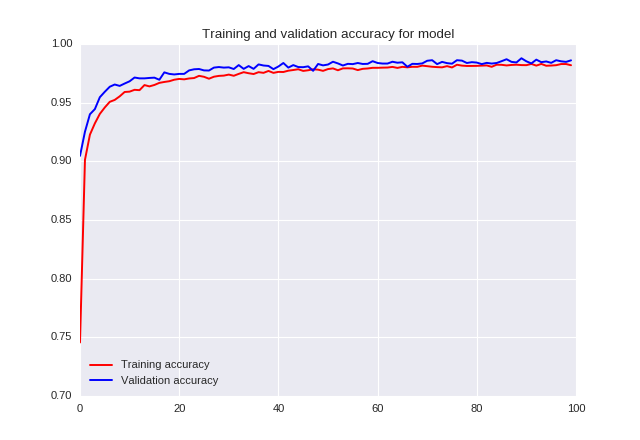

In [29]:
%matplotlib notebook
# plot the accuraccy of the training and validation data for the model
nacc = nhistory.history['acc']
nval_acc = nhistory.history['val_acc']
epoch2 = range(len(nacc)) # so that it matches the nacc,nval_acc dimensions
plt.plot(epoch2, nacc, 'r', label='Training accuracy')
plt.plot(epoch2, nval_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy for model')
plt.legend(loc='lower left')
plt.show()


### Confusion matrix for this model

In [30]:
npredictions=nmodel.predict(Xval)
print(npredictions.shape) # Probabilities for each label
npredictions[5:10]

(8400, 10)


array([[2.66552641e-10, 7.71131119e-17, 3.53673215e-08, 4.18006471e-16,
        8.85797834e-16, 1.49111816e-04, 9.99850154e-01, 7.00143207e-18,
        6.68227813e-07, 1.47531943e-12],
       [6.66296784e-14, 1.20710733e-11, 1.00000000e+00, 1.04783080e-08,
        2.49864886e-12, 3.16021026e-15, 4.58706369e-13, 1.24348052e-08,
        9.17129928e-09, 4.64724457e-14],
       [1.08577325e-07, 2.20032939e-06, 9.94585991e-01, 5.07426262e-03,
        2.00488168e-11, 4.07748413e-09, 7.06680758e-09, 4.26332881e-05,
        2.94726808e-04, 4.80981144e-10],
       [1.06487974e-12, 5.18817177e-11, 5.82167878e-08, 7.52177209e-10,
        1.68554511e-11, 3.71312851e-14, 3.46081317e-17, 9.99999881e-01,
        3.10114824e-12, 7.45060120e-08],
       [2.87391003e-07, 9.99959588e-01, 2.53788994e-06, 6.11325769e-13,
        6.94310984e-07, 7.66095312e-11, 1.16574711e-07, 3.63166400e-05,
        3.00171536e-07, 2.72243632e-08]], dtype=float32)

In [31]:
# turn the predicted probabilities to predicted labels
nlabels_prediction=np.argmax(npredictions, axis=1)    
nlabels_prediction[5:10]

array([6, 2, 2, 7, 1])

In [32]:
# Check the validation data
Yval[5:10] 

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
# turn from one hot encoding to a matrix with classes
nlabel_validation=np.argmax(Yval, axis=1)  
nlabel_validation[5:10]

array([6, 2, 2, 7, 1])

In [34]:
# calculate the confusion matrix
nmat=confusion_matrix(nlabels_prediction,nlabel_validation)
print(nmat)

[[810   0   0   0   0   0   0   0   0   0]
 [  0 889   0   0   1   0   0   0   0   0]
 [  0   3 842   1   0   0   0   7   1   0]
 [  0   2   0 929   0   1   0   1   0   1]
 [  0   1   1   0 819   0   0   0   0   1]
 [  0   0   0   3   0 694   2   1   3   2]
 [  3   4   0   0   4   2 779   0   0   0]
 [  0   8   1   2   1   0   0 879   1   1]
 [  3   2   2   2   2   5   4   0 830   6]
 [  0   0   0   0  12   0   0   5   0 827]]


In [35]:
ntarget_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(nlabel_validation, nlabels_prediction, target_names=ntarget_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       816
     Class 1       1.00      0.98      0.99       909
     Class 2       0.99      1.00      0.99       846
     Class 3       0.99      0.99      0.99       937
     Class 4       1.00      0.98      0.99       839
     Class 5       0.98      0.99      0.99       702
     Class 6       0.98      0.99      0.99       785
     Class 7       0.98      0.98      0.98       893
     Class 8       0.97      0.99      0.98       835
     Class 9       0.98      0.99      0.98       838

   micro avg       0.99      0.99      0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



## 5.Display the images with the highest errors for both models

In [36]:
#Errors are the difference between predicted labels and true labels
#Find the locations where the error is not zero for the labels
errors = (labels_prediction - label_validation != 0) # first model
print(errors)

[False False False ... False False False]


### First model

[68 33 32 76 84 71]


<IPython.core.display.Javascript object>


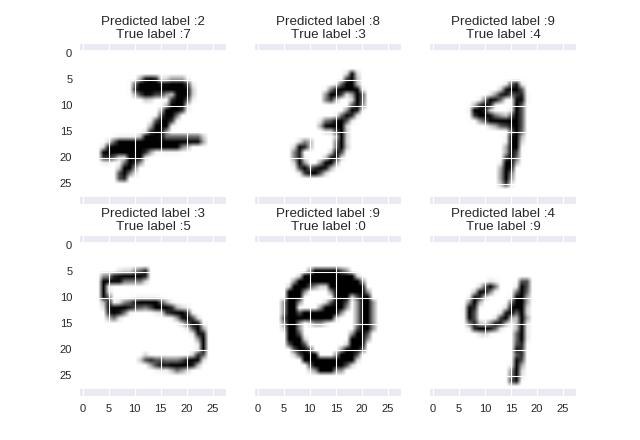

In [37]:
#Find where the errors are not zero for the labels and images
# isolate the true labels with the highest errors
Y_true_classes_he = label_validation[errors]
# isolate the predicted label probabilities with the highest errors
Y_pred_he = predictions[errors]
# isolate the prediction labels with the highest errors
Y_pred_classes_he = labels_prediction[errors]
# images with the highest error, for plotting
X_val_he = Xval[errors]
# Maximum probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_he,axis = 1)
# Predicted probabilities of the true label values in the error subset
true_prob_errors = np.diagonal(np.take(Y_pred_he, Y_true_classes_he, axis=1))
# Difference between the probability of the predicted label and the true label in the error subset
diff_pred_true_err = Y_pred_errors_prob - true_prob_errors
# Sorted list of the delta prob errors
sorted_diff_err = np.argsort(diff_pred_true_err)
# Top 6 errors 
highest_errors = sorted_diff_err[-6:]
print(highest_errors)

# The following function shows 6 images with the predicted vs real labels
def display_images(err_index,image_err,pred_errors, true_errors):
    n = 0
    nr = 2
    nc = 3
    fig, ax = plt.subplots(nr,nc,sharex=True,sharey=True)
    for row in range(nr):
        for col in range(nc):
            error = err_index[n]
            ax[row,col].imshow((image_err[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],true_errors[error]))
            n += 1
            
# plot the images with the highest errors
display_images(highest_errors, X_val_he, Y_pred_classes_he, Y_true_classes_he)           

### Second model with augmentation

[92  5 32 73 70 17]


<IPython.core.display.Javascript object>


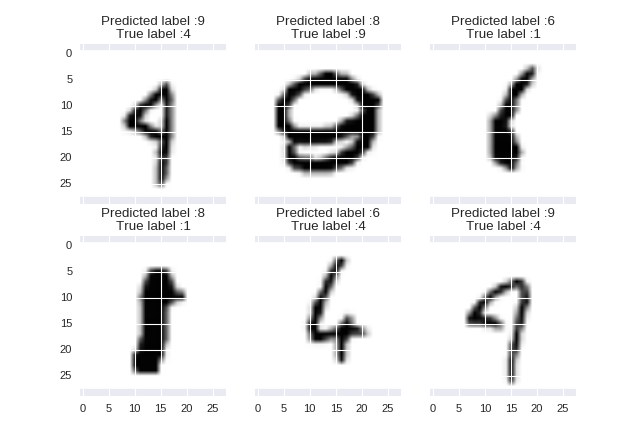

In [38]:
#Errors are the difference between predicted labels and true labels
#Find the locations where the error is not zero for the labels
nerrors = (nlabels_prediction - nlabel_validation != 0) # model with augmentation
#print(nerrors)

# isolate the true labels with the highest errors
nY_true_classes_he = nlabel_validation[nerrors]
# isolate the predicted label probabilities with the highest errors
nY_pred_he = npredictions[nerrors]
# isolate the prediction labels with the highest errors
nY_pred_classes_he = nlabels_prediction[nerrors]
# images with the highest error, for plotting
nX_val_he = Xval[nerrors]
# Maximum probabilities of the wrong predicted numbers
nY_pred_errors_prob = np.max(nY_pred_he,axis = 1)
# Predicted probabilities of the true label values in the error subset
ntrue_prob_errors = np.diagonal(np.take(nY_pred_he, nY_true_classes_he, axis=1))
# Difference between the probability of the predicted label and the true label in the error subset
ndiff_pred_true_err = nY_pred_errors_prob - ntrue_prob_errors
# Sorted list of the delta prob errors
nsorted_diff_err = np.argsort(ndiff_pred_true_err)
# Top 6 errors for this model 
nhighest_errors = nsorted_diff_err[-6:]
print(nhighest_errors)
# plot the images with the highest errors for this model
display_images(nhighest_errors, nX_val_he, nY_pred_classes_he, nY_true_classes_he)   
